# Analysis of Eurovision performances in the past five years

To try and understand which types of songs and performances are the most successful in the Eurovision song contest, we analyzed all the performances from the Eurovision finals from 2015 to 2019. 

The categories we chose to describe each performance are:

1. year<br>
2. country<br>
3. name of performer<br>
4. song title<br>
5. solo, duo or group<br>
6. song genre<br>
7. song rating<br>
8. performance rating<br>
9. alone on stage<br>
10. special effects<br>
11. props on stage<br>
12. memorability rating<br>
13. choreography<br>
14. backup dancers<br>
15. final placement<br>
16. televoting<br>
17. jury<br>
18. total<br>

Category number five is about the performer, whether they're solo or else.<br>
The category "song genre" can have the following values: <br>
sentimental ballad, power ballad, dance pop, ethnic, pop rock, popera (operatic pop), country, pop ballad, pop, electro (electronic), outlier and debatable.

The song, performance and memorability rating categories are mostly subjective based on our opinion, and they include integer values from 1 (bad) to 5 (great). Memorability rating is greater when the performance is controversial or unusual, or just well made and beloved by the Eurovision audience.

The categories alone on stage, special effects, props on stage, choreography and backup dancers aim to describe the performance. Their values are either "yes" or "no". Alone on stage is "no" even if the only other people on stage are backup vocals, props on stage being "yes" could mean anything from instruments to coffins, suitcases etc. being part of the performance. Special effects mostly means that the artists included pyrotechnics, special visual effects that alter the performance (not including the animated screen behind the performer which is present for every performance) or else. Each performance has a choreography, however, the performance will only be described as having a choreography if it's elaborate, the dance moves are cautiously planned etc. 

Televoting and jury points aren't available for 2015, but they are for the years 2016-2019. Each country votes twice, once by televoting (anyone from the country can vote) and once via specialized jury (critics specifically chosen by that country). When combined, we get the total points the country won that year. Jury and televoting opinion always differs, sometimes more drastically, sometimes less. With this dataset, we can see how their tastes differ. 


With this dataset we aim to analyze the yearly Eurovision trends and try to predict a Eurovision contestant's placement, based on the type of their performance.

## General statistics of the acquired data

In [1]:
import pandas as pd
df = pd.read_excel ('2015-2019 performers.xlsx')
#df.describe()

import numpy as np
from csv import DictReader

reader = DictReader(open('performers.csv', 'rt', encoding='utf-8'))

countries = dict()
years = dict()
genres = dict()
top = []
site = dict()

years['2015'] = []
years['2016'] = []
years['2017'] = []
years['2018'] = []
years['2019'] = []

rows = []
# 0 means no, 1 means yes

for row in reader:
    year = row['year']
    country = row['country']
    performer = [row['name of performer'], row['song title'], row['solo, duo or group']]
    ratings = [row['song rating'], row['performance rating'], row['memorability rating']]
    performance_desc = [row['alone on stage'], row['special effects'], row['props on stage'], row['choreography'], row['backup dancers']]
    genre = row['song genre'].strip()
    if not genres.get(genre):
        genres[genre] = 1
    else:
        genres[genre]+=1
    
    results = [row['final placement'], row['televoting'], row['jury'], row['total']]
    if not countries.get(country):
        countries[country] = []
    data = []
    for x in performer:
        data.append(x.strip())
    for x in ratings:
        data.append(x.strip())
    data.append(genre)
    for x in performance_desc:
        if x == "yes":
            data.append(1)
        else:
            data.append(0)
    for x in results:
        data.append(x)
    countries[country].append([year] + data)
    
    years[year].append([country] + data)
    
    if int(data[12]) >= 1 and int(data[12]) <= 5:
        top.append(data)
        rows.append((country, year))
    
    site[(year, country)] = data
    
# Country info :
# 0 - 6   year, name of performer, song title, solo/duo/group, song rating, performance rating, mem. rating
# 7 - 12  song genre, alone on stage, spec. effects, props, choreo, backup dancers
# 12 - 16 final placement, televoting points, jury points, total points
# ex.['2016', 'Douwe Bob', 'Slow Down', 'solo', '2', '1', '1', 'country', 0, 0, 1, 0, 0, '11', '39', '114', '153']



In [2]:
zanrovi = sorted(genres.keys())
print(zanrovi)
genrkey = dict()
i = 0
for zanr in zanrovi:
    genrkey[zanr] = i
    i+=1
    

['country', 'dance pop', 'debatable', 'electro', 'ethnic', 'outlier', 'pop', 'pop ballad', 'pop rock', 'popera', 'power ballad', 'rock', 'sentimental ballad']


In [3]:
X = []
labels = []
for key, value in site.items():
    value = value[3:]
    if value[0] == "solo":
        value[0] = 1
    elif value[0] == "duo":
        value[0] = 2
    elif value[0] == "group":
        value[0] = 3
    
    value[3] = genrkey[value[3]]
    for i in range(len(value)):
        value[i] = int(value[i])
    X.append(value) 
    labels.append(key)

Genre analysis:

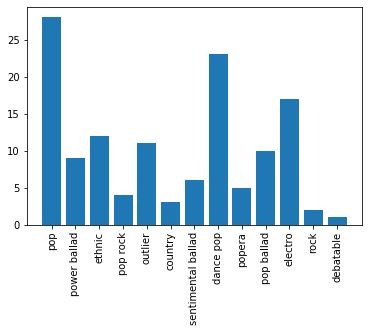

In [4]:
import matplotlib.pyplot as plt

plt.bar(*zip(*genres.items()))
plt.gca().set_xticklabels(genres.keys(), rotation=90)

plt.show()

Overlapping genres:

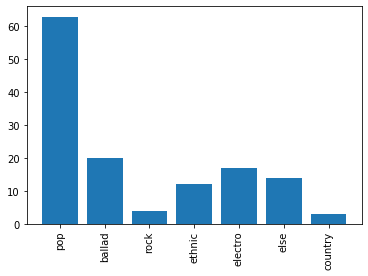

In [5]:
overlapping = dict()
overlapping["pop"] = genres["pop"] + genres["dance pop"] + genres["pop ballad"]//2 + genres["pop rock"] // 2 + genres["popera"]
overlapping["ballad"] = genres["sentimental ballad"] + genres["power ballad"] + genres["pop ballad"]//2
overlapping["rock"] = genres["rock"] + genres["pop rock"] // 2 
overlapping["ethnic"] = genres["ethnic"]
overlapping["electro"] = genres["electro"]
overlapping["else"] = genres["outlier"] + genres["debatable"] + genres["popera"]//2
overlapping["country"] = genres["country"]

        
plt.bar(*zip(*overlapping.items()))
plt.gca().set_xticklabels(overlapping.keys(), rotation=90)

plt.show()        
            

Eurovision song genres aren't always strictly defined and most songs have multiple genres, or belong to a specific subgenre. Whether we analyze them by their main genre or their specific subgenre, pop is the predominant genre with almost 50% of the songs belonging to this genre, and the second place belongs to the electronic genre. Ballads are also very popular, as well as ethnic songs. Rock and country are the least popular genres.

The "else" category includes songs with gospel, funk, swing, industrial techno etc. 

## What does the usual Eurovision performance look like?

In [6]:
df["solo, duo or group"].describe()

count      131
unique       3
top       solo
freq       101
Name: solo, duo or group, dtype: object

In [7]:
df["alone on stage"].describe()

count     131
unique      2
top        no
freq       77
Name: alone on stage, dtype: object

In [8]:
df["special effects"].describe()

count     131
unique      2
top       yes
freq       75
Name: special effects, dtype: object

In [9]:
df["props on stage"].describe()

count     131
unique      2
top       yes
freq       73
Name: props on stage, dtype: object

In [10]:
df["choreography"].describe()

count     131
unique      2
top        no
freq       73
Name: choreography, dtype: object

In [11]:
df["backup dancers"].describe()

count     131
unique      2
top        no
freq       80
Name: backup dancers, dtype: object

The usual Eurovision performer is a solo artist who isn't alone on stage, has special effects in their performance, has props on stage, doesn't have an elaborate choreography and doesn't have backup dancers.


In [12]:
# Country info :
# 0 - 6   year, name of performer, song title, solo/duo/group, song rating, performance rating, mem. rating
# 7 - 12  song genre, alone on stage, spec. effects, props, choreo, backup dancers
# 12 - 16 final placement, televoting points, jury points, total points

columns = ["artist", "song", "s/d/g", "song rating", "per. rating", "mem. rating", "genre", "alone", "effects", "props", "choreo", "dancers", "placement", "televoting", "jury", "total"]

dataframe = pd.DataFrame(top)
dataframe.columns = columns
dataframe.index = rows


In [13]:
dataframe["genre"].describe()

count            25
unique            9
top       dance pop
freq              8
Name: genre, dtype: object

In [14]:
dataframe.describe()

,alone,effects,props,choreo,dancers
count,25.000000,25.000000,25.0,25.000000,25.0
mean,0.480000,0.680000,0.4,0.520000,0.4
std,0.509902,0.476095,0.5,0.509902,0.5
min,0.000000,0.000000,0.0,0.000000,0.0
25%,0.000000,0.000000,0.0,0.000000,0.0
50%,0.000000,1.000000,0.0,1.000000,0.0
75%,1.000000,1.000000,1.0,1.000000,1.0
max,1.000000,1.000000,1.0,1.000000,1.0


Almost half of the artists who end up in the top 5 are alone on stage and don't have an elaborate choreography, they predominantly have special effects on stage, it's slightly more likely that they don't have backup dancers. 



In [15]:
dataframe.loc[dataframe['placement'] == "1"]

,artist,song,s/d/g,song rating,per. rating,mem. rating,genre,alone,effects,props,choreo,dancers,placement,televoting,jury,total
"(Sweden, 2015)",Mans Zelmerlow,Heroes,solo,5,5,5,dance pop,1,1,0,1,0,1,-1,-1,365
"(Ukraine, 2016)",Jamala,1944,solo,5,5,4,ethnic,1,0,0,0,0,1,323,211,534
"(Portugal, 2017)",Salvador Sobral,Amar pelos dois,solo,5,5,4,sentimental ballad,1,0,0,0,0,1,376,382,758
"(Israel, 2018)",Netta,Toy,solo,4,3,3,electro,0,1,1,1,1,1,317,212,529
"(Netherlands, 2019)",Duncan Laurence,Arcade,solo,3,3,1,pop ballad,1,0,1,0,0,1,261,237,498


When it comes to winning performances, the variables aren't that equally distributed. <br>
A winning performance from 2015 to 2019 usually means the artist is alone on stage, doesn't have special effects or props on stage, dancers are rarely included and an elaborate choreography is also rare. 
Their performances are usually memorable and well rated, with a good song. The only exception in this list is last year's winner, whose song and performance were mediocre, but the compromise between jury and televoting led to its victory.

The trends of this decade are very different from the trends of last decade.
From the years 2001 to 2009, all the winners weren't alone on stage and the predominant type of winning performance was flashy, well choreographed and overall very energized. <br>
From 2010 to 2019 however, the accent is put on the artist's stage presence and their ability to engage the audience. Only three winners out of ten weren't alone on stage (Azerbaijan 2011, Denmark 2013 and Israel 2018). <br>

We can see that the winning genres in the past few years are quite diverse.


In [16]:
dataframe.loc[dataframe['placement'] == "2"]

,artist,song,s/d/g,song rating,per. rating,mem. rating,genre,alone,effects,props,choreo,dancers,placement,televoting,jury,total
"(Russia, 2015)",Polina Gagarina,A million voices,solo,4,3,3,power ballad,0,1,1,0,0,2,-1,-1,303
"(Australia, 2016)",Dami Im,Sound of silence,solo,4,3,1,pop ballad,1,1,1,1,0,2,191,320,511
"(Bulgaria, 2017)",Kristian Kostov,Beautiful mess,solo,4,4,3,electro,1,1,0,0,0,2,337,278,615
"(Cyprus, 2018)",Eleni Foureira,Fuego,solo,5,5,5,dance pop,0,1,0,1,1,2,253,183,436
"(Italy, 2019)",Mahmood,Soldi,solo,5,5,3,outlier,0,1,0,1,1,2,253,219,472


## Most popular genre by year

In [17]:
df.loc[df['year'] == 2015]["song genre"].describe()

count               27
unique              11
top       power ballad
freq                 6
Name: song genre, dtype: object

In [18]:
df.loc[df['year'] == 2016]["song genre"].describe()

count      26
unique     10
top       pop
freq        7
Name: song genre, dtype: object

In [19]:
df.loc[df['year'] == 2017]["song genre"].describe()

count      26
unique      9
top       pop
freq        8
Name: song genre, dtype: object

In [20]:
df.loc[df['year'] == 2018]["song genre"].describe()

count            26
unique           10
top       dance pop
freq              7
Name: song genre, dtype: object

In [21]:
df.loc[df['year'] == 2019]["song genre"].describe()

count            26
unique           11
top       dance pop
freq              6
Name: song genre, dtype: object

In 2015, the most popular genre was power ballad which makes sense, since the 2014 winner was quite a memorable power ballad (Rise like a Phoenix by Konchita Wurst). <br>
In 2016 and 2017, the most popular genre was pop, the winner in 2015 was a dance pop song. The winner in 2016 had mixed ethnic and pop elements. <br>
The most popular genre in 2018 and 2019 was dance pop.


## Differences between jury and televoting points

We've already said that the jury and the televoters have different tastes, but how different are they really?


In [22]:
df["televoting"].describe()

count    131.000000
mean      74.106870
std       92.772198
min       -1.000000
25%        3.000000
50%       35.000000
75%      102.500000
max      376.000000
Name: televoting, dtype: float64

In [23]:
df["jury"].describe()

count    131.000000
mean      74.282443
std       78.694959
min       -1.000000
25%        9.000000
50%       48.000000
75%      114.500000
max      382.000000
Name: jury, dtype: float64

In [24]:
df.loc[df['year'] == 2019].sort_values(by=['jury']).tail(5)

,year,country,name of performer,song title,"solo, duo or group",song genre,song rating,performance rating,alone on stage,special effects,props on stage,memorability rating,choreography,backup dancers,final placement,televoting,jury,total
124,2019,Azerbaijan,Chingiz,Truth,solo,dance pop,3,2,yes,yes,yes,2,yes,no,8,100,202,302
126,2019,Italy,Mahmood,Soldi,solo,outlier,5,5,no,yes,no,3,yes,yes,2,253,219,472
116,2019,Netherlands,Duncan Laurence,Arcade,solo,pop ballad,3,3,yes,no,yes,1,no,no,1,261,237,498
113,2019,Sweden,John Lundvik,Too late for love,solo,outlier,4,3,no,yes,no,1,no,no,5,93,241,334
112,2019,North Macedonia,Tamara Todevska,Proud,solo,power ballad,5,5,yes,yes,no,3,no,no,7,58,247,305


In [25]:
df.loc[df['year'] == 2019].sort_values(by=['televoting']).tail(5)

,year,country,name of performer,song title,"solo, duo or group",song genre,song rating,performance rating,alone on stage,special effects,props on stage,memorability rating,choreography,backup dancers,final placement,televoting,jury,total
128,2019,Switzerland,Luca Hanni,She got me,solo,dance pop,4,4,no,yes,no,2,yes,yes,4,212,152,364
109,2019,Russia,Sergey Lazarev,Scream,solo,debatable,3,2,yes,yes,yes,1,yes,no,3,244,126,370
126,2019,Italy,Mahmood,Soldi,solo,outlier,5,5,no,yes,no,3,yes,yes,2,253,219,472
116,2019,Netherlands,Duncan Laurence,Arcade,solo,pop ballad,3,3,yes,no,yes,1,no,no,1,261,237,498
119,2019,Norway,KEiiNO,Spirit in the sky,group,electro,3,3,yes,yes,no,2,no,no,6,291,40,331


There are vast disparities between the jury and televoting points awarded to North Macedonia (winner according to the jury, difference of 189 points), Norway (televoting winner, difference of 251 points) and Sweden (second according to the jury, difference of 148 points). <br>
The winner and the runner up (Netherlands and Italy) have much smaller deviations in points. <br>

In [26]:
df.loc[df['year'] == 2018].sort_values(by=['jury']).tail(5)

,year,country,name of performer,song title,"solo, duo or group",song genre,song rating,performance rating,alone on stage,special effects,props on stage,memorability rating,choreography,backup dancers,final placement,televoting,jury,total
103,2018,Cyprus,Eleni Foureira,Fuego,solo,dance pop,5,5,no,yes,no,5,yes,yes,2,253,183,436
89,2018,Germany,Michael Schulte,You let me walk alone,solo,pop ballad,2,2,yes,yes,no,1,no,no,4,136,204,340
100,2018,Israel,Netta,Toy,solo,electro,4,3,no,yes,yes,3,yes,yes,1,317,212,529
98,2018,Sweden,Benjamin Ingrosso,Dance you off,solo,dance pop,4,3,yes,yes,yes,2,yes,no,7,21,253,274
83,2018,Austria,Cesar Sampson,Nobody but you,solo,outlier,3,2,no,yes,yes,1,no,no,3,71,271,342


In [27]:
df.loc[df['year'] == 2018].sort_values(by=['televoting']).tail(5)

,year,country,name of performer,song title,"solo, duo or group",song genre,song rating,performance rating,alone on stage,special effects,props on stage,memorability rating,choreography,backup dancers,final placement,televoting,jury,total
93,2018,Denmark,Rasmussen,Higher ground,solo,outlier,2,2,no,no,yes,2,yes,yes,9,188,38,226
92,2018,Czech Republic,Mikolas Josef,Lie to me,solo,dance pop,4,4,no,yes,yes,2,yes,yes,6,215,66,281
104,2018,Italy,Ermal Meta & Fabrizio Moro,Non mi avete fatto niente,duo,outlier,3,2,yes,yes,no,2,no,no,5,249,59,308
103,2018,Cyprus,Eleni Foureira,Fuego,solo,dance pop,5,5,no,yes,no,5,yes,yes,2,253,183,436
100,2018,Israel,Netta,Toy,solo,electro,4,3,no,yes,yes,3,yes,yes,1,317,212,529


Here we can see that in 2018, only two countries appear on both of the lists of the top five by jury and televoting points, Israel (who was the winner, also was the winner according to televoting but third according to the jury) and Cyprus (who was second according to televoting and second in total, was fifth according to the jury).

In [28]:
df.loc[df['year'] == 2017].sort_values(by=['televoting']).tail(5)

,year,country,name of performer,song title,"solo, duo or group",song genre,song rating,performance rating,alone on stage,special effects,props on stage,memorability rating,choreography,backup dancers,final placement,televoting,jury,total
72,2017,Romania,Ilinca ft Alex Florea,Yodel it!,duo,outlier,2,2,no,no,yes,2,no,no,7,224,58,282
75,2017,Belgium,Blanche,City Lights,solo,electro,4,2,yes,no,no,2,no,no,4,255,108,363
59,2017,Moldova,Sunstroke Project,"Hey, Mamma!",group,electro,4,4,no,no,yes,3,yes,yes,3,264,110,374
77,2017,Bulgaria,Kristian Kostov,Beautiful mess,solo,electro,4,4,yes,yes,no,3,no,no,2,337,278,615
63,2017,Portugal,Salvador Sobral,Amar pelos dois,solo,sentimental ballad,5,5,yes,no,no,4,no,no,1,376,382,758


In [29]:
df.loc[df['year'] == 2017].sort_values(by=['jury']).tail(5)

,year,country,name of performer,song title,"solo, duo or group",song genre,song rating,performance rating,alone on stage,special effects,props on stage,memorability rating,choreography,backup dancers,final placement,televoting,jury,total
58,2017,Netherlands,O'G3NE,Lights and shadows,group,pop,3,2,yes,no,no,1,no,no,11,15,135,150
66,2017,Australia,Isaiah,Don't come easy,solo,pop,3,2,yes,no,no,2,no,no,9,2,171,173
76,2017,Sweden,Robin Bengtsson,I can't go on,solo,dance pop,4,4,no,no,yes,4,yes,yes,5,126,218,344
77,2017,Bulgaria,Kristian Kostov,Beautiful mess,solo,electro,4,4,yes,yes,no,3,no,no,2,337,278,615
63,2017,Portugal,Salvador Sobral,Amar pelos dois,solo,sentimental ballad,5,5,yes,no,no,4,no,no,1,376,382,758


In 2017, the jury and televoters agreed in their choice. They both picked the same winner and runner up. This year's winner holds the record for the most points won. 

In [30]:
df.loc[df['year'] == 2016].sort_values(by=['televoting']).tail(5)

,year,country,name of performer,song title,"solo, duo or group",song genre,song rating,performance rating,alone on stage,special effects,props on stage,memorability rating,choreography,backup dancers,final placement,televoting,jury,total
34,2016,Bulgaria,Poli Genova,If Love Was A Crime,solo,dance pop,5,4,no,yes,no,3,yes,yes,4,180,127,307
39,2016,Australia,Dami Im,Sound of silence,solo,pop ballad,4,3,yes,yes,yes,1,yes,no,2,191,320,511
38,2016,Poland,Michal Szpak,Color of your life,solo,popera,4,3,no,no,yes,4,no,no,8,222,7,229
47,2016,Ukraine,Jamala,1944,solo,ethnic,5,5,yes,no,no,4,no,no,1,323,211,534
44,2016,Russia,Sergey Lazarev,You Are The Only One,solo,dance pop,4,5,no,yes,yes,3,yes,yes,3,361,130,491


In [31]:
df.loc[df['year'] == 2016].sort_values(by=['jury']).tail(5)

,year,country,name of performer,song title,"solo, duo or group",song genre,song rating,performance rating,alone on stage,special effects,props on stage,memorability rating,choreography,backup dancers,final placement,televoting,jury,total
44,2016,Russia,Sergey Lazarev,You Are The Only One,solo,dance pop,4,5,no,yes,yes,3,yes,yes,3,361,130,491
48,2016,Malta,Ira Losco,Walk on water,solo,electro,4,2,no,yes,no,1,yes,yes,12,16,137,153
37,2016,France,Amir,J'ai Cherche,solo,pop,4,3,yes,no,no,1,no,no,6,109,148,257
47,2016,Ukraine,Jamala,1944,solo,ethnic,5,5,yes,no,no,4,no,no,1,323,211,534
39,2016,Australia,Dami Im,Sound of silence,solo,pop ballad,4,3,yes,yes,yes,1,yes,no,2,191,320,511


In 2016, once again the jury and the televoters disagreed. They both agreed that Ukraine should be the runner up (however, Ukraine ended up being the winner), but the jury picked Australia for the winner (Australia ended up being the runner up), while televoters picked Russia as the winner (they ended up third). <br>
Here we can also see some discrepancies between the votes, notably Poland (215 points difference), Russia (231 points difference), Australia (129 points difference) and Malta (113 points difference).

## Clustering of performances

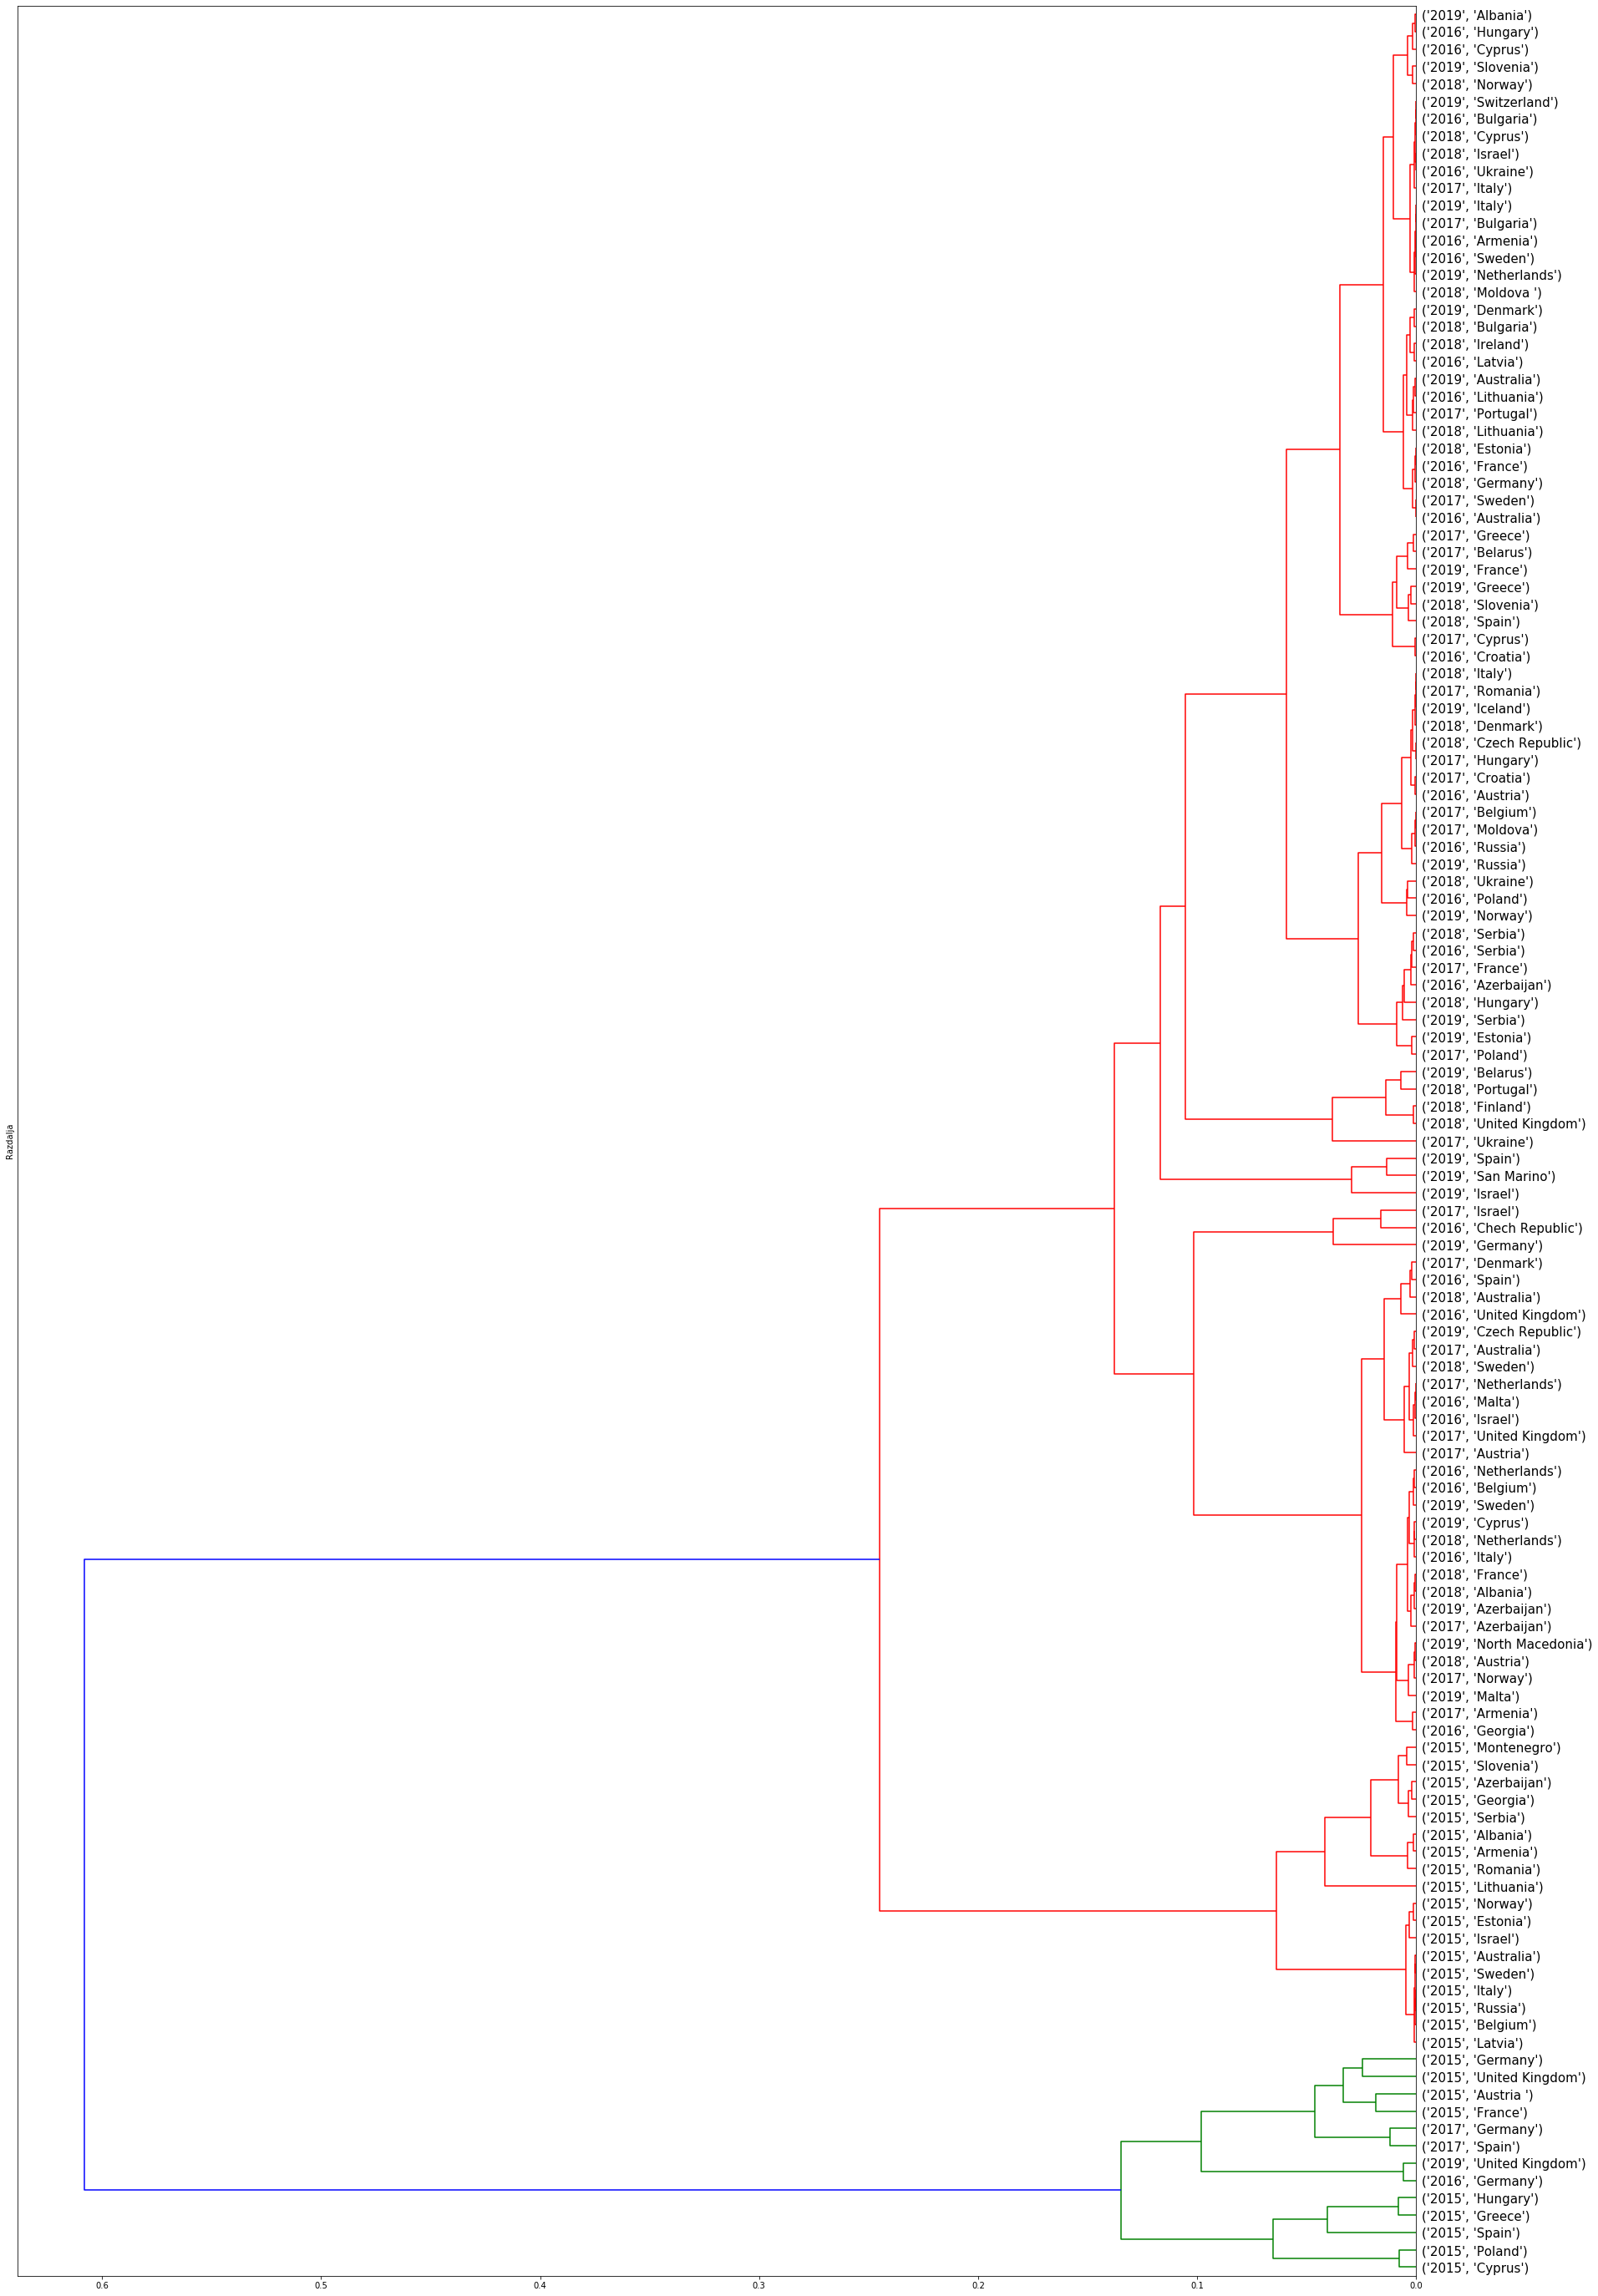

In [32]:
import numpy as np
import scipy.cluster.hierarchy as sch
import scipy

        
L = sch.linkage(X, method="average", metric="cosine")

plt.figure(figsize=(30, 50))
D  = sch.dendrogram(L, labels=labels, leaf_font_size=15, orientation='left')

plt.ylabel("Razdalja")
plt.show()